In [1]:

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

from sklearn.decomposition import PCA

DATA_PATH = './data/'


In [2]:
corpus = []
file_list = []

for i in range(1000):
    file_list.append('News_' + str(i + 1) + '_E.txt')

for file_name in file_list:
    file_path = DATA_PATH + file_name
    file = open(file_path, encoding='utf-8')
    corpus.append(file.read())

In [3]:
# 分词向量化
vectorizer = CountVectorizer()
word_vec = vectorizer.fit_transform(corpus)

In [4]:
#提取TF-IDF词向量
transformer = TfidfTransformer()
tfidf = transformer.fit_transform(word_vec)
tfidf_matrix = tfidf.toarray()  #对应tfidf矩阵

In [5]:
#压缩 Feature
pca = PCA(n_components=3)
tfidf_matrix = pca.fit_transform(tfidf_matrix)

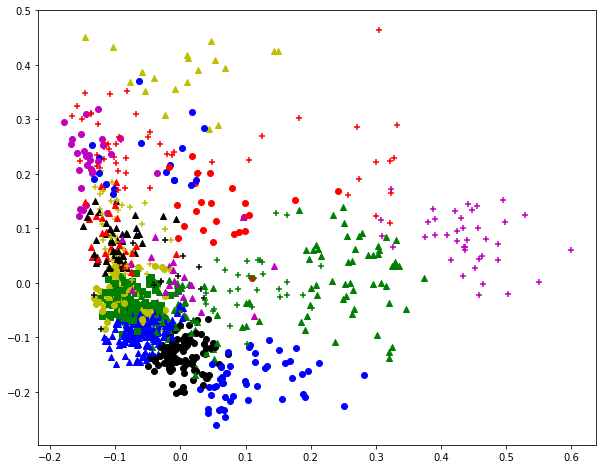

In [6]:
# K-Means

km_cluster = KMeans(n_clusters=20, max_iter=300, n_init=2,
                    init='random', verbose=False)

# 返回各自文本的所被分配到的类索引
labels = km_cluster.fit_predict(tfidf_matrix)

markers = ['^', '^', '^', '^', '^', '^', '^', 'o', 'o', 'o', 'o', 'o', 'o', '+', '+', '+', '+', '+', '+', 's', 's']
colors = ['r', 'g', 'b', 'm', 'k', 'y', 'g', 'r', 'b', 'm', 'k', 'y', 'b', 'g', 'r', 'm', 'k', 'y', 'r', 'g' ]

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
for i in range(len(labels)):
    plt.scatter(tfidf_matrix[i, 0], tfidf_matrix[i, 1], c=colors[labels[i]], marker=markers[labels[i]])
fig.savefig('./kMeans.png', transparent=False, dpi=600, bbox_inches="tight")



[ 2 19 16  0 10 17  2 19 19 19  2  3  6  5 11  3 11 10  6  1 19  0 10 15
 19  2  0  1 15  0 19  8  1 15  1  8 16 11 19 11  2  2 12  2  2  2 11 14
  1  4  7  1  2  1  7  8 17  2  8  8  4 11  4 11 11  2  8 19  8 19 10  2
 14 17  2 10 19 15 15 19 19 14  6  5  2 17  8 17  2 11  2  9  6  6 19  3
  4 18 18 14  1 13  2  2  6 19 19 19  5 13 12  6 12  3 19 10 19 17 14 12
 18 12 17 19 14  1 19 16 12 11  1  2  4  2 12 16 19 19  6 17  9  4 15 17
 19 11  1  0  2 10 17  3 17  0 19  8 19  1  6 11  1  9 15 14  2  1 15 19
  1 10 10  2  2 14  2 10  6 10 10 10  8 10 18  1 10  6 17  2 11 16  1  2
 19  9 11  4 11 17 19  9 11  5  1  7 15 13  8  8  5 14 15 10  9 10 10  2
  0  8  5  4 14 14  4 12  3 18  7  3  2  9 19 19 11 15 15 13 10  8 19 19
 14 13  2 11 11 10  4  6 10 10  8 10  8 10 10  1 15  1 18  9 10 14 17 19
 10 17  6  4  1  2 10 19  9  8 15 13 14  4  3 19 14 17  6 10 19 19  6 12
  2 17  6  8  2  2  8  3  6  8  4 10  6  2 14 10 11  1 17 19  9  8  6 10
  8 12 10 17 19 17 10 10  4  8  2 13 19  1 10  2  1

<ipython-input-7-dc2dc82486a8>:10: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


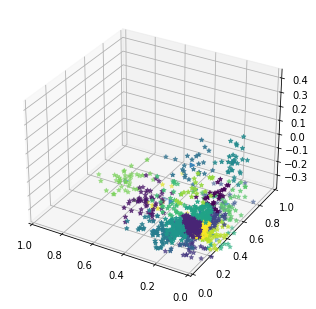

In [7]:
# 三维可视化
label_pred = km_cluster.labels_  # 获取聚类标签

centroids = km_cluster.cluster_centers_  # 获取聚类中心

print(label_pred)
print(centroids)

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(tfidf_matrix[:, 0], tfidf_matrix[:, 1], tfidf_matrix[:, 2], c=labels, marker='*')

ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='>')
plt.axis([1, 0, 0, 1])
plt.show()